In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Ames_Housing_Remove_Outliers (remove skew from SalePrice).csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,463.680925
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,324.037035
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,414.728827
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,493.963561
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,435.775171


In [4]:
len(df)

2840

## DEAL WITH MISSING DATA

In [5]:
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice         float64
Length: 81, dtype: object

In [6]:
df.drop(columns='PID',inplace=True)

# remove PID since it doesnt required in modelling later

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

# total missing data in DF * 100 / numbers of rows

# filtered to only above 0 percent of missing value

Electrical         0.035211
Garage Area        0.035211
Bsmt Half Bath     0.035211
Bsmt Full Bath     0.035211
Total Bsmt SF      0.035211
Bsmt Unf SF        0.035211
BsmtFin SF 1       0.035211
BsmtFin SF 2       0.035211
Garage Cars        0.035211
Mas Vnr Area       0.739437
Mas Vnr Type       0.739437
BsmtFin Type 2     2.711268
Bsmt Cond          2.711268
Bsmt Qual          2.711268
BsmtFin Type 1     2.711268
Bsmt Exposure      2.816901
Garage Type        5.316901
Garage Finish      5.387324
Garage Qual        5.387324
Garage Cond        5.387324
Garage Yr Blt      5.387324
Lot Frontage      16.795775
Fireplace Qu      49.507042
Fence             80.316901
Alley             93.309859
Misc Feature      96.302817
Pool QC           99.683099
dtype: float64

In [8]:
percent_missing.index

Index(['Electrical', 'Garage Area', 'Bsmt Half Bath', 'Bsmt Full Bath',
       'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Garage Cars', 'Mas Vnr Area', 'Mas Vnr Type', 'BsmtFin Type 2',
       'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'Bsmt Exposure',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Garage Yr Blt', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

In [87]:
msno.matrix

NameError: name 'msno' is not defined

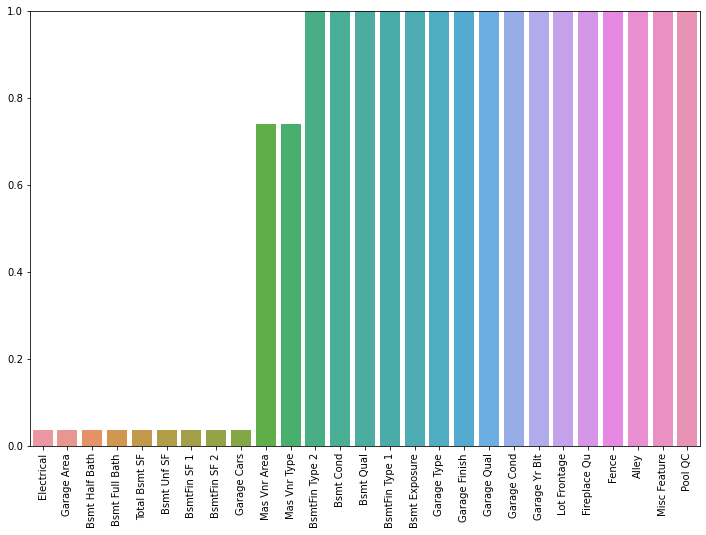

In [9]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

# create a barplot of percentage of missing data
# plt.ylim -- zoom in the graph

In [10]:
df[['Electrical','Garage Area','Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2','Garage Cars']].isnull().sum()

# checking the number of missing value on each features

Electrical        1
Garage Area       1
Bsmt Half Bath    1
Bsmt Full Bath    1
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 1      1
BsmtFin SF 2      1
Garage Cars       1
dtype: int64

In [11]:
df.dtypes['Electrical']

# check the data type for the missing data
# example = electrical (object) --- cant be replace with mean(int), can be replace with strings ('None')

dtype('O')

In [12]:
df['Electrical'] 

# consider the data is missing because no NaN value available in the list (notepad)

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
2835    SBrkr
2836    SBrkr
2837    SBrkr
2838    SBrkr
2839    SBrkr
Name: Electrical, Length: 2840, dtype: object

In [13]:
df.loc[df['Electrical'].isnull()] 

# locate the index of missing value

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1531,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,409.267639


In [14]:
df.drop([1546],axis=0,inplace=True)

# dropping the missing value

In [15]:
df['Electrical'].isnull().sum()

# check to see if there is still missing data in the features

1

In [16]:
df['Garage Area']

0       22.978251
1       27.018512
2       17.663522
3       22.847319
4       21.954498
          ...    
2835    24.248711
2836    22.000000
2837     0.000000
2838    20.445048
2839    25.495098
Name: Garage Area, Length: 2839, dtype: float64

In [17]:
df.loc[df['Garage Area'].isnull()]['Garage Area'] 

2162   NaN
Name: Garage Area, dtype: float64

In [18]:
df['Garage Area']=df['Garage Area'].fillna(0)  

# numerical fill Na with 0
# the house may not have a garage, therefore choose 0 as it is the lowest value

In [19]:
df['Garage Area'].isnull().sum()  # the garage area NaN value had been replace by 0

0

In [20]:
bsmt=['Bsmt Half Bath','Bsmt Full Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2']

# can combine all bsmt features into 1 as it is all float

In [21]:
df.dtypes[bsmt]

Bsmt Half Bath    float64
Bsmt Full Bath    float64
Total Bsmt SF     float64
Bsmt Unf SF       float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
dtype: object

In [22]:
df[bsmt]

,Bsmt Half Bath,Bsmt Full Bath,Total Bsmt SF,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2
0,0.0,1.0,1080.0,441.0,639.0,0.0
1,0.0,0.0,882.0,270.0,468.0,144.0
2,0.0,0.0,1329.0,406.0,923.0,0.0
3,0.0,1.0,2110.0,1045.0,1065.0,0.0
4,0.0,0.0,928.0,137.0,791.0,0.0
...,...,...,...,...,...,...
2835,0.0,1.0,1003.0,184.0,819.0,0.0
2836,0.0,1.0,864.0,239.0,301.0,324.0
2837,1.0,0.0,912.0,575.0,337.0,0.0
2838,0.0,1.0,1389.0,195.0,1071.0,123.0


In [23]:
df[bsmt].isnull().sum()

Bsmt Half Bath    1
Bsmt Full Bath    1
Total Bsmt SF     1
Bsmt Unf SF       1
BsmtFin SF 1      1
BsmtFin SF 2      1
dtype: int64

In [24]:
df[bsmt]=df[bsmt].fillna(0)

# fill the whole bsmt missing data with 0

In [25]:
df[bsmt].isnull().sum()

Bsmt Half Bath    0
Bsmt Full Bath    0
Total Bsmt SF     0
Bsmt Unf SF       0
BsmtFin SF 1      0
BsmtFin SF 2      0
dtype: int64

In [26]:
df.loc[df['Garage Cars'].isnull()]['Garage Cars'] 

2162   NaN
Name: Garage Cars, dtype: float64

In [27]:
df['Garage Cars']

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2835    2.0
2836    2.0
2837    0.0
2838    2.0
2839    3.0
Name: Garage Cars, Length: 2839, dtype: float64

In [28]:
df['Garage Cars']=df['Garage Cars'].fillna(0.0) # fill with 0 value

In [29]:
df['Garage Cars'].isnull().sum()  # no NaN value present in Garage Cars anymore

0

In [30]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical         0.035224
Mas Vnr Type       0.739697
Mas Vnr Area       0.739697
Bsmt Qual          2.712223
Bsmt Cond          2.712223
BsmtFin Type 1     2.712223
BsmtFin Type 2     2.712223
Bsmt Exposure      2.817894
Garage Type        5.318774
Garage Cond        5.389222
Garage Qual        5.389222
Garage Finish      5.389222
Garage Yr Blt      5.389222
Lot Frontage      16.801691
Fireplace Qu      49.489257
Fence             80.309968
Alley             93.307503
Misc Feature      96.301515
Pool QC           99.682987
dtype: float64

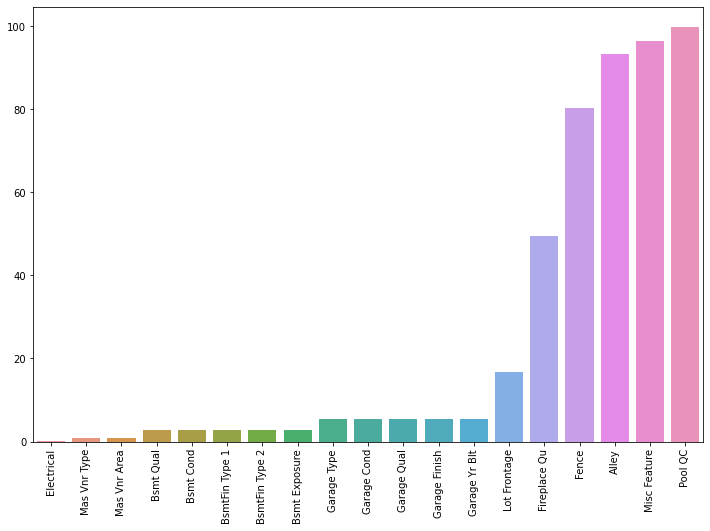

In [31]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [32]:
df[['Mas Vnr Type','Mas Vnr Area']].isnull().sum()

Mas Vnr Type    21
Mas Vnr Area    21
dtype: int64

In [33]:
df.dtypes[['Mas Vnr Type','Mas Vnr Area']]

# Mas Vnr Type - object
# Mas Vnr Area - float

Mas Vnr Type     object
Mas Vnr Area    float64
dtype: object

In [34]:
df.loc[df['Mas Vnr Type'].isnull()] 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
52,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,465.295605
465,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,507.444578
497,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,474.341649
518,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,430.000000
843,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,445.533388
1065,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,419.523539
1087,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,496.990946
1090,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,426.614580
1095,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,453.817144
1151,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,452.769257


In [35]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')

# since it is strings features, fill it with None (from notepad)

In [36]:
df['Mas Vnr Type']

0         Stone
1          None
2       BrkFace
3          None
4          None
         ...   
2835       None
2836       None
2837       None
2838       None
2839    BrkFace
Name: Mas Vnr Type, Length: 2839, dtype: object

In [37]:
df['Mas Vnr Type'].isnull().sum()

0

In [38]:
df["Mas Vnr Area"]

0       10.583005
1        0.000000
2       10.392305
3        0.000000
4        0.000000
          ...    
2835     0.000000
2836     0.000000
2837     0.000000
2838     0.000000
2839     9.695360
Name: Mas Vnr Area, Length: 2839, dtype: float64

In [39]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0.0)

In [40]:
df['Mas Vnr Area'].isnull().sum()

0

In [41]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical         0.035224
Bsmt Qual          2.712223
Bsmt Cond          2.712223
BsmtFin Type 1     2.712223
BsmtFin Type 2     2.712223
Bsmt Exposure      2.817894
Garage Type        5.318774
Garage Cond        5.389222
Garage Qual        5.389222
Garage Yr Blt      5.389222
Garage Finish      5.389222
Lot Frontage      16.801691
Fireplace Qu      49.489257
Fence             80.309968
Alley             93.307503
Misc Feature      96.301515
Pool QC           99.682987
dtype: float64

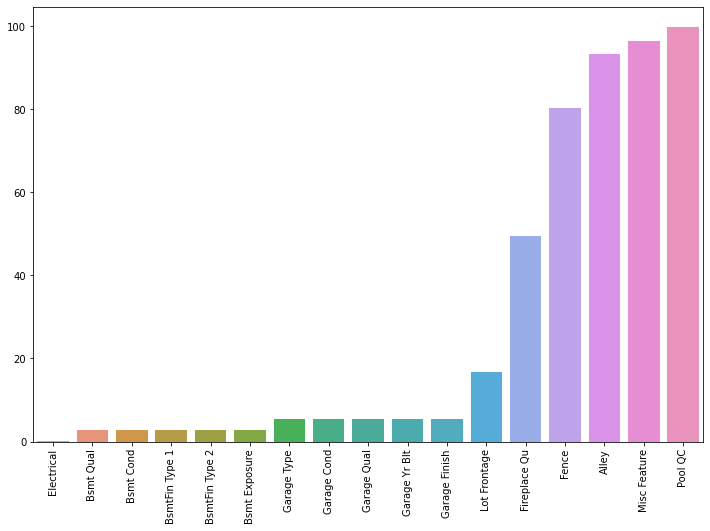

In [42]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [43]:
df[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']].isnull().sum()

Bsmt Qual         77
Bsmt Cond         77
BsmtFin Type 1    77
BsmtFin Type 2    77
Bsmt Exposure     80
dtype: int64

In [44]:
bsmt=['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']

# combine all basement into a variables

In [45]:
df[bsmt]

,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure
0,TA,Gd,BLQ,Unf,Gd
1,TA,TA,Rec,LwQ,No
2,TA,TA,ALQ,Unf,No
3,TA,TA,ALQ,Unf,No
4,Gd,TA,GLQ,Unf,No
...,...,...,...,...,...
2835,TA,TA,GLQ,Unf,Av
2836,Gd,TA,BLQ,ALQ,Av
2837,Gd,TA,GLQ,Unf,Av
2838,Gd,TA,ALQ,LwQ,Av


In [46]:
df.dtypes[['Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','Bsmt Exposure']]

# all the features are object

Bsmt Qual         object
Bsmt Cond         object
BsmtFin Type 1    object
BsmtFin Type 2    object
Bsmt Exposure     object
dtype: object

In [47]:
df[bsmt]=df[bsmt].fillna('NA')

# fill the data in all the features with NA (from notepad)

In [48]:
df[bsmt].isnull().sum() # no missing value anymore

Bsmt Qual         0
Bsmt Cond         0
BsmtFin Type 1    0
BsmtFin Type 2    0
Bsmt Exposure     0
dtype: int64

In [49]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical        0.035224
Garage Type       5.318774
Garage Yr Blt     5.389222
Garage Finish     5.389222
Garage Qual       5.389222
Garage Cond       5.389222
Lot Frontage     16.801691
Fireplace Qu     49.489257
Fence            80.309968
Alley            93.307503
Misc Feature     96.301515
Pool QC          99.682987
dtype: float64

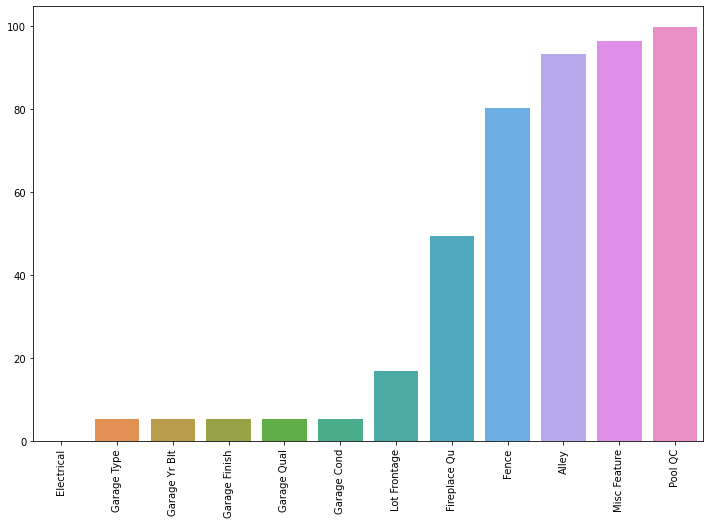

In [50]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [51]:
garage=['Garage Type','Garage Finish','Garage Qual','Garage Cond']

# combine all garage features into one variables

In [52]:
df[garage]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2835,Detchd,Unf,TA,TA
2836,Attchd,Unf,TA,TA
2837,NaN,NaN,NaN,NaN
2838,Attchd,RFn,TA,TA


In [53]:
df[garage].isnull().sum()

Garage Type      151
Garage Finish    153
Garage Qual      153
Garage Cond      153
dtype: int64

In [54]:
df.dtypes[['Garage Type','Garage Finish','Garage Qual','Garage Cond']]

# all the features is object 

Garage Type      object
Garage Finish    object
Garage Qual      object
Garage Cond      object
dtype: object

In [55]:
df[garage]=df[garage].fillna('NA') 

# fill all missing value in the feature with NA (from notepad)

In [56]:
df[garage].isnull().sum()

# no missing value

Garage Type      0
Garage Finish    0
Garage Qual      0
Garage Cond      0
dtype: int64

In [57]:
df['Garage Yr Blt']

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2835    1984.0
2836    1983.0
2837       NaN
2838    1975.0
2839    1993.0
Name: Garage Yr Blt, Length: 2839, dtype: float64

In [58]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [59]:
df['Garage Yr Blt'].isnull().sum()

0

In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035224
Lot Frontage    16.801691
Fireplace Qu    49.489257
Fence           80.309968
Alley           93.307503
Misc Feature    96.301515
Pool QC         99.682987
dtype: float64

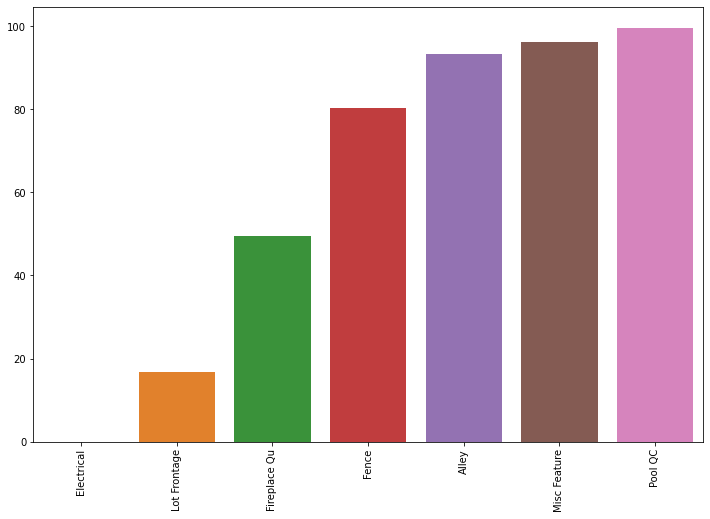

In [61]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [62]:
df['Lot Frontage'].isnull().sum()

477

In [63]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2835     37.0
2836      NaN
2837     62.0
2838     77.0
2839     74.0
Name: Lot Frontage, Length: 2839, dtype: float64

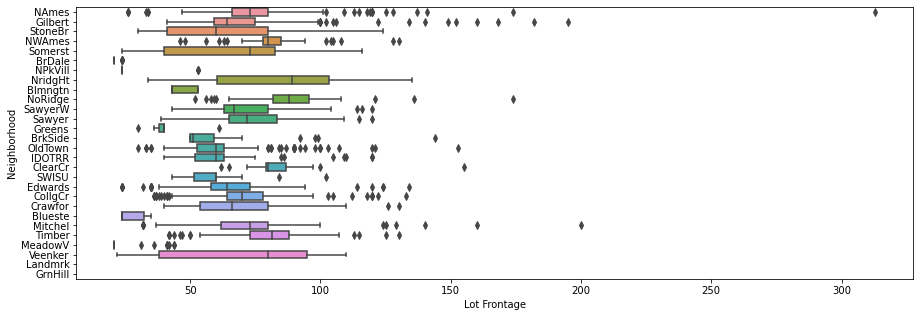

In [64]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df);

# plot the relationship of lot frontage with its respective neighborhood

In [65]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.913978
ClearCr    85.176471
CollgCr    71.220183
Crawfor    69.850000
Edwards    64.391813
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.333333
Landmrk          NaN
MeadowV    25.606061
Mitchel    74.306818
NAmes      74.975741
NPkVill    28.142857
NWAmes     81.535714
NoRidge    89.000000
NridgHt    82.156463
OldTown    61.816143
SWISU      59.046512
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.797468
StoneBr    61.945946
Timber     78.870370
Veenker    70.000000
Name: Lot Frontage, dtype: float64

https://stackoverflow.com/questions/40299055/pandas-how-to-fill-null-values-with-mean-of-a-groupby

In [66]:
df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

# fill the missing data of Lot Frontage will the mean of its respective neighborhood

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2835     37.000000
2836     74.306818
2837     62.000000
2838     77.000000
2839     74.000000
Name: Lot Frontage, Length: 2839, dtype: float64

In [67]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.mean()))

# assign lot frontage to the series of mean value

In [68]:
df['Lot Frontage']

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2835     37.000000
2836     74.306818
2837     62.000000
2838     77.000000
2839     74.000000
Name: Lot Frontage, Length: 2839, dtype: float64

In [69]:
df['Lot Frontage'].isnull().sum()

2

In [70]:
df['Lot Frontage']=df['Lot Frontage'].fillna(df['Lot Frontage'].mean())

# fill the remaining missing value of the features with its mean

In [71]:
df['Lot Frontage'].isnull().sum()

0

In [72]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035224
Fireplace Qu    49.489257
Fence           80.309968
Alley           93.307503
Misc Feature    96.301515
Pool QC         99.682987
dtype: float64

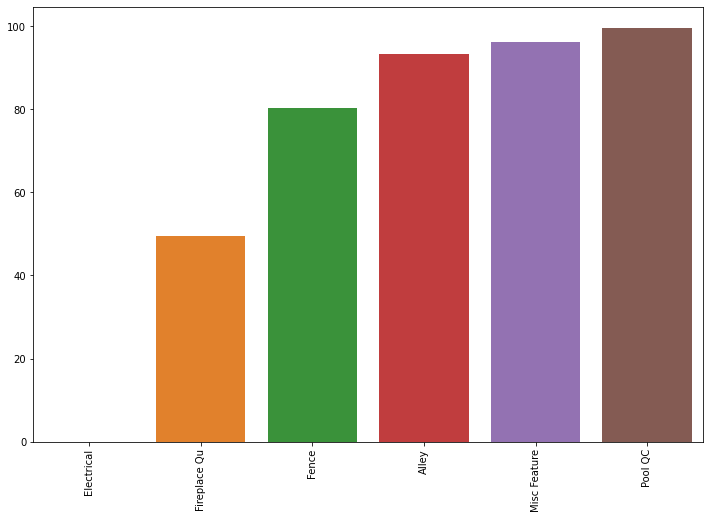

In [73]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [74]:
df['Fireplace Qu'].isnull().sum()

1405

In [75]:
df['Fireplace Qu']

0        Gd
1       NaN
2       NaN
3        TA
4        TA
       ... 
2835    NaN
2836    NaN
2837    NaN
2838     TA
2839     TA
Name: Fireplace Qu, Length: 2839, dtype: object

In [76]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('NA')

# fill the missing data with NA (from notepad)

In [77]:
df['Fireplace Qu'].isnull().sum()

0

In [78]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical       0.035224
Fence           80.309968
Alley           93.307503
Misc Feature    96.301515
Pool QC         99.682987
dtype: float64

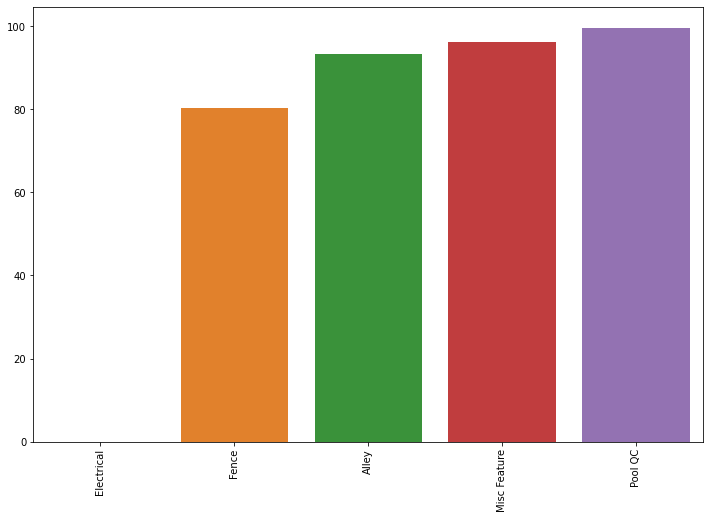

In [79]:
plt.figure(figsize=(12,8))

sns.barplot(x=percent_missing.index,y=percent_missing);
plt.xticks(rotation=90)

plt.show()

In [80]:
df=df.drop(columns=['Fence','Alley','Misc Feature','Pool QC'])

# since the missing value is over 80 percent of data, better to drop the column as it has less useful data

## EVALUATE AFTER FILL MISSING DATA

In [81]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing = percent_missing[percent_missing > 0].sort_values()

percent_missing

Electrical    0.035224
dtype: float64

In [82]:
df['Bsmt Qual'].isnull().sum()

0

In [83]:
df['Fireplace Qu'].isnull().sum()

0

In [84]:
df['Garage Type'].isnull().sum()

0

In [85]:
df.info()

# all the missing data in the dataset had been filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2839
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2839 non-null   int64  
 1   MS Zoning        2839 non-null   object 
 2   Lot Frontage     2839 non-null   float64
 3   Lot Area         2839 non-null   int64  
 4   Street           2839 non-null   object 
 5   Lot Shape        2839 non-null   object 
 6   Land Contour     2839 non-null   object 
 7   Utilities        2839 non-null   object 
 8   Lot Config       2839 non-null   object 
 9   Land Slope       2839 non-null   object 
 10  Neighborhood     2839 non-null   object 
 11  Condition 1      2839 non-null   object 
 12  Condition 2      2839 non-null   object 
 13  Bldg Type        2839 non-null   object 
 14  House Style      2839 non-null   object 
 15  Overall Qual     2839 non-null   int64  
 16  Overall Cond     2839 non-null   int64  
 17  Year Built    

## save no missing value data set

In [86]:
df.to_csv('Ames_Housing_No_Missing_Data_removeskew.csv',index=False)